In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv('Google_stock_price_train.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#Use the Open Stock Price Column to Train Your Model.
training_set = data_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
X_train.shape

(1198, 60)

In [8]:
y_train.shape

(1198,)

In [9]:
#Reshape the data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [10]:
#Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

C:\Users\sahit\anaconda3\anaconda_\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#Fitting the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - loss: 0.0771
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0061
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0055
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0049
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0053
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0059
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0044
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0038
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0046
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0044
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0043
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0042
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0046
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0034
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 152

In [14]:
#Extracting the actual stock prices of Jan-2017
data_test = pd.read_csv('Google_stock_price_test.csv')
actual_stock_price = data_test.iloc[:,1:2].values

In [17]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis=0)
inputs = data_total[len(data_total)- len(data_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [18]:
#Predicting the values for Jan2017 Stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


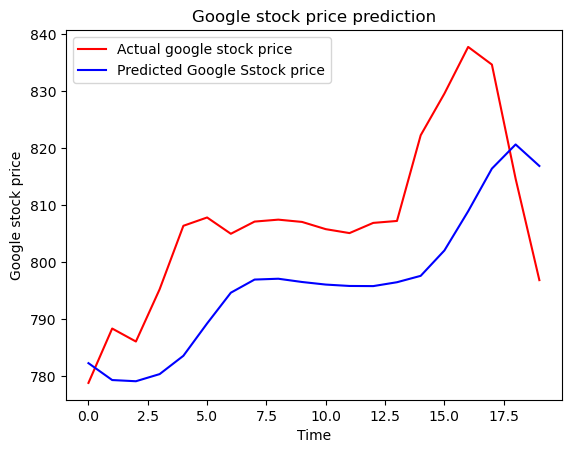

In [20]:
#Plotting the Actual and Predicted Prices for Google Stocks.
plt.plot(actual_stock_price, color = 'red', label = 'Actual google stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Sstock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()